## Analyzing Risk Premium During Conflict Events

Intuitively, we know that **risk premiums tend to increase during crises**, particularly during wartime, as uncertainty leads investors to demand higher returns. However, we aim to explore this relationship in greater depth. Specifically, we analyze how risk premiums behave **before**, **during**, and **after** the following key conflict-related events:

- **Israel attacks Iran** — *2025-06-13*
- **USA attacks Iran** — *2025-06-22*
- **Ceasefire** — *2025-06-24*

To conduct this analysis, we focus on **natural gas** and **crude oil**, as they are highly sensitive to geopolitical developments, particularly in the Middle East—a region critical to our global energy supply.

### Research Questions
1. How do cumulative excess returns change before, during, and after the conflict events?
2. Are there statistically significant changes in returns or volatility around these dates?
3. Do risk premiums spike immediately after the attacks, or are they priced in beforehand due to market efficiency?

***

**Analysis Working**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


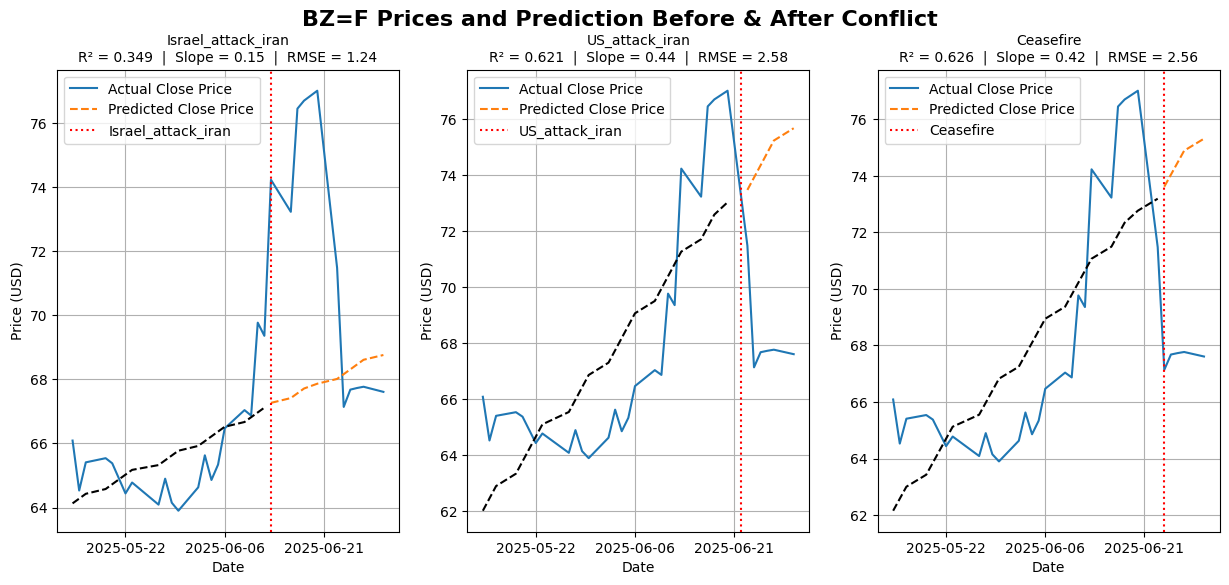

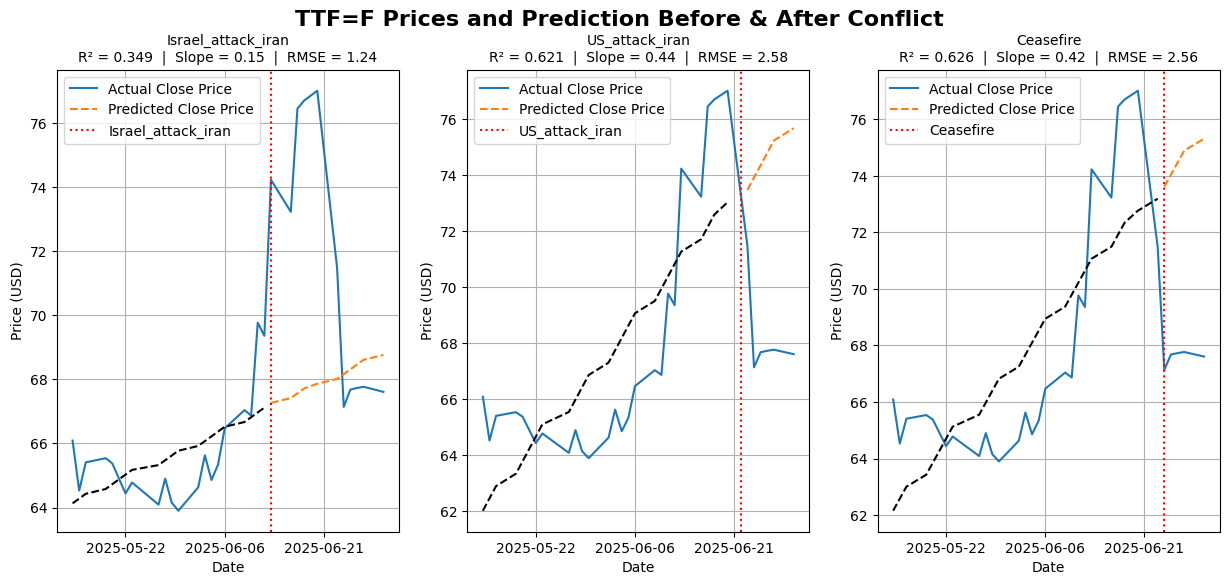

In [4]:
from src.analyze_plot import analyze_conflict

tickers = ["BZ=F", "TTF=F"]
for i in tickers:
    df,fig = analyze_conflict(i, 30) 

***

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def analyze_conflict(ticker, period):
    israel_attack_iran = datetime(2025, 6, 13)
    us_attack_iran = datetime(2025, 6, 22)
    ceasefire = datetime(2025, 6, 24)
    end = datetime(2025, 7, 1)

    commodity_df = yf.download("BZ=F", start=israel_attack_iran - timedelta(days=period),end=end)

    events = [("Israel_attack_iran", israel_attack_iran), ("US_attack_iran",us_attack_iran),("Ceasefire",ceasefire)]

    for event_name, event_date in events:

        trainingset_period1 = commodity_df[commodity_df.index < event_date]
        X_train = np.arange(len(trainingset_period1)).reshape(-1, 1)
        Y_train = trainingset_period1["Close"].values

        model = LinearRegression()
        model.fit(X_train, Y_train)

        X_all = np.arange(len(commodity_df)).reshape(-1, 1)
        Y_pred_all = model.predict(X_all)

        commodity_df["Predicted"] = Y_pred_all
        commodity_df["Residual"] = commodity_df["Close"] - Y_pred_all

        
    return commodity_df



df = analyze_conflict("BZ=F", 30)

df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Predicted,Residual
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F,,
Date,,,,,,,
2025-05-14,66.089996,66.589996,65.680000,66.519997,49980,62.155925,NaN
2025-05-15,64.529999,65.839996,63.439999,65.760002,70642,62.580370,NaN
2025-05-16,65.410004,65.540001,64.169998,64.629997,38629,63.004814,NaN
2025-05-19,65.540001,66.010002,64.430000,65.309998,43539,63.429259,NaN
2025-05-20,65.379997,66.000000,64.849998,65.570000,42663,63.853703,NaN
2025-05-21,64.910004,67.489998,64.610001,65.610001,58658,64.278148,NaN
2025-05-22,64.440002,65.019997,63.529999,64.639999,45811,64.702592,NaN
2025-05-23,64.779999,65.040001,63.310001,64.019997,29810,65.127037,NaN
